<a href="https://colab.research.google.com/github/JonasHagstrom79/Tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other commbination of variables, even shorter... predicting a number.


In [2]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


#Creating some data to view and fit

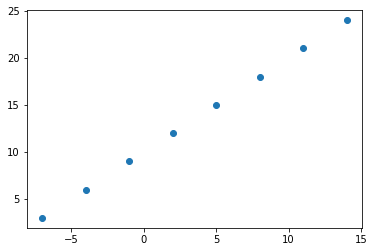

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Create features(upper case)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) 

#Create labels(lower case)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y);

In [4]:
y == X + 10 #(The relationship for our neural network to learn)

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [5]:
#Create a deo tensor for our price predicition problem
house_info  = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
#X to predict y
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
#X to predict y
X[0], y[0]

(-7.0, 3.0)

In [8]:
#X to predict y
X[1], y[1]

(-4.0, 6.0)

### Fix

If you're running TensorFlow 2.7.0+ and you're passing a vector to a model, you need to expand its dimensions.

    ## OLD
    # Fit the model
    model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
     
    ## New
    # Fit the model
    model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

In [9]:
#Turn our NumPy arrays into tenors
X = tf.cast(tf.constant(X), dtype=tf.float32) #Change dtype from float64 to float 32
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

##Steps in modeling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function(in other words, the function wich tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels)

In [11]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using Sequentila API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) #input, the model takes in one number and predicts one number, adds the layer to a list, thare are other ways to do this aswell. I.e model = tf.keras.Sequential(), new line. model.add(tf.keras.layers.Dense(1))
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error(i.e how wrong is our predictions)
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics=["mae"]) #You can often use a string variable to define that you want to ue that specific function

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #Look at X and y and try to figure out the paterns/relationships in epoch tries


Epoch 1/5
1/1 [==============================] - 1s 611ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


🔧 **Practice:** Info and example of Sequential: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [12]:
#Check out of X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
#Try to make a prediction with our model
y_pred = model.predict([17.0]) #A prediction to X=17 an y SHOULD BE 27(X+10..)
y_pred

array([[12.716021]], dtype=float32)

In [14]:
y_pred  + 11

array([[23.71602]], dtype=float32)

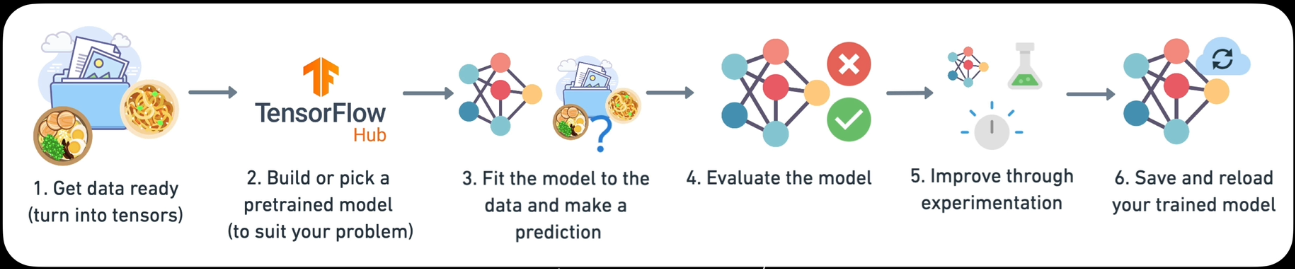
#Steps in modelling with TensorFlow
1. Construct or import a pretrained model relevant to your problem
2. Compile the model(prepare it to be used with data)
 * **Loss** - how rong your model's predictions are compared to the truthlabels(you want to minimise this)
 * **Optimizer** - how your model should update its internal patterns to better its perfection
 * **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns
 * **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data(how reliable are our model's predictions?)


#Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs**(leave i training for longer) or on more data(give the model more examples to learn from).

In [15]:
#Let's rebuild the model

#1. Create the model
model = tf.keras.Sequential([ #Sequential runs from top to bottom
        tf.keras.layers.Dense(100, activation="relu"),#added
        tf.keras.layers.Dense(100, activation="relu"),#added
        tf.keras.layers.Dense(100, activation="relu"),#added
        tf.keras.layers.Dense(1)                    
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              #optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

#3. Fit the model (longer trainng)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1500)

Epoch 1/1500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 908ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/1500
1/1 [==============================] - 0s 10ms/step - loss: 14.2781 - mae: 14.2781
Epoch 3/1500
1/1 [==============================] - 0s 16ms/step - loss: 14.2469 - mae: 14.2469
Epoch 4/1500
1/1 [==============================] - 0s 18ms/step - loss: 14.2158 - mae: 14.2158
Epoch 5/1500
1/1 [==============================] - 0s 10ms/step - loss: 14.1840 - mae: 14.1840
Epoch 6/1500
1/1 [==============================] - 0s 11ms/step - loss: 14.1522 - mae: 14.1522
Epoch 7/1500
1/1 [==============================] - 0s 8ms/step - loss: 14.1204 - mae: 14.1204
Epoch 8/1500
1/1 [==============================] - 0s 9ms/step - loss: 14.0885 - mae: 14.0885
Epoch 9/1500
1/1 [==============================] - 0s 9ms/step - loss: 14.0568 - mae: 14.0568
Epoch 10/1500
1/1 [==============================] - 0s 9ms/step - loss: 14.0250 - mae: 14.0250
Epoch 11/1500
1/1 [==============================] - 0s

In [16]:
model.predict([17.0]) #overfitting?

array([[27.775532]], dtype=float32)

In [21]:
#Lets see if we can make another to improve our model
#Adjust one thing at a time, small changes to be certain what caused the improvement

#1. Create the model (an extra hidden layer with 100 units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                             
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) #metrics must be in a list

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 788ms/step - loss: 13.5267 - mae: 13.5267
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9594 - mae: 12.9594
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.3983 - mae: 12.3983
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8281 - mae: 11.8281
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2463 - mae: 11.2463
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6465 - mae: 10.6465
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3938 - mae: 9.3938
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7211 - mae: 8.7211
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.0110 - mae: 8.0110
Epoch 11/100
1/1 [==============================] - 0s 6ms/ste

In [22]:
#Lets remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
#Lets make a prediciton
model.predict([17.0])

array([[31.824467]], dtype=float32)

###Common ways to improve a deep learning model:
* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimization function
* **Change the learning rate** - of the optimizer lr or learning_rate, learning rate is the most important hyperparameter of many neural networks
* Fittnig on more data - i.e a larger dataset
* Fitting for longer - epochs++


##Evaluating a model

In practice. a typical workflow you´ll go through when building neural networks is:
```
Building a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```


When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It´s a good ide to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [24]:
#Make a bigger dataset(5 times the datat than the previous dataset we tried earlier)
X = tf.range(-100, 100, 4) #range from -100 to 100 with a step of 4
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
#Make labels for the dataset
y = X + 10 #This is the formula we want our model to learn, the pattern
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

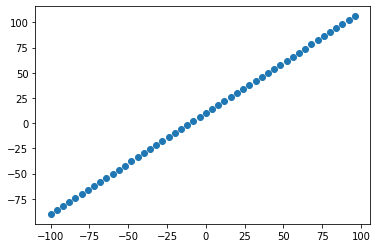

In [28]:
#Visualize the data
import matplotlib.pyplot as plt
#plt.plot(X, y) #line
plt.scatter(X, y)

###The three sets

* **Training set** - the model learns from this data, wich is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned(tweaked) on this data, wich is typically10-15% of the data available. This is dropped if u goes for two sets
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

⚡ **Three datasets:** You can see it this way:

* Training set -> Course material
* Validation set -> Practice exam
* Test set -> Final exam

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.

In [29]:
#Check the lenght of how many samples we have
len(X)
#Mnimum a 100+ for deep learning so we skip the Validation set for now

50

In [30]:
#Split the data into train and test sets
X_train =  X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

###Visualing the data

Now we'vegot our data in traiong and test sets... let's visualize it again!

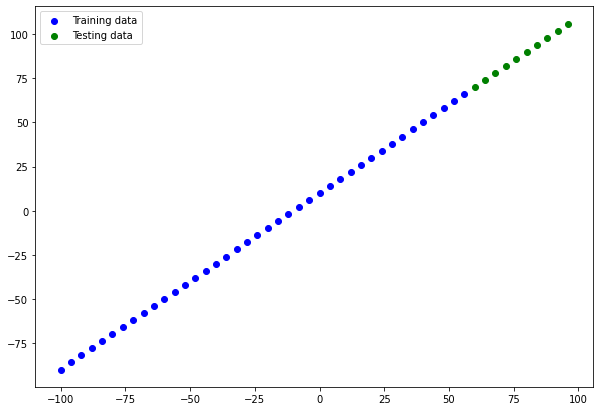

In [31]:
plt.figure(figsize=(10, 7))
#Plot training data in blue(c="b")
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#Show legend
plt.legend(); #semicolon at the end so we dont get the matplotlib output